# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Muhammad Lutfi Salinggih
- **Email:** lutfisalinggih@gmail.com
- **ID Dicoding:** salinggih

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penjualan Dalam Beberapa Bulan terakhir ?
- Apabila Dilakukan Pengelompokan Customer Berdasarkan Total spending, Bagaimana aktivitas dari pelanggan tersebut selama setahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Import customer dataset
customer_df = pd.read_csv('./Data/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Import geolocation dataset
geolocation_df = pd.read_csv('./Data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# Import ordered item dataset
order_items_df = pd.read_csv('./Data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Import order payment dataset
order_payments_df = pd.read_csv('./Data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
#import order review dataset
order_reviews_df = pd.read_csv('./Data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# Import orders dataset
orders_df= pd.read_csv('./Data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
#import product category dataset
product_category_df = pd.read_csv('./Data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
#import product dataset
products_df = pd.read_csv('./Data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
#import seller dataset
seller_df = pd.read_csv('./Data/sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Terdapat 9 Tabel yang berisi data data dari e-commerce
- produk akhir akan menggabungkan seluruh 9 tabel yang ada

### Assessing Data

#### Tabel customer

In [11]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [14]:
customer_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())


Jumlah duplikasi:  0


**Insight dari tabel customer:**
- terdapat 99441 instance
- tidak terdapat *Null atau data yang kosong*
- tidak ada data yang terduplikasi
- tidak ada keanehan pada datatype dari masing masing fitur

#### Tabel Geolocation

In [16]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [19]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [20]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())


Jumlah duplikasi:  261831


**Insight dari tabel geolocation:**
- terdapat 1,000,163 instance
- tidak terdapat *Null atau data yang kosong*
- terdapat 261,831 data yang terduplikasi
- tidak ada keanehan pada datatype dari masing masing fitur

#### Tabel order item

In [21]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [24]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())


Jumlah duplikasi:  0


**Insight dari tabel order_item:**
- terdapat 112650 instance
- tidak terdapat *Null atau data yang kosong*
- tidak ada data yang terduplikasi
- seharusnya shipping limit date menggunakan data type date time

#### Tabel payment order

In [25]:
order_payments_df.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [26]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [28]:
unique_payment_types = order_payments_df['payment_type'].unique()
print(unique_payment_types)

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [29]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [30]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight dari tabel order_item:**
- terdapat 103886 instance
- tidak terdapat *Null atau data yang kosong*
- tidak ada data yang terduplikasi
- tidak ada keanehan dalam datatype yang digunakan

#### Tabel order review

In [31]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [32]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [33]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [34]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [35]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight dari tabel review:**
- terdapat 99224 instance
- kolom yang memiliki missing value yaitu comment message dan title bisa di drop karena sudah diwakili oleh review score
- tidak ada data yang terduplikasi
- date dan time stamp bisa menggunakan date time pada data type nya

#### Tabel order

In [36]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [37]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [39]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [40]:
print("Jumlah duplikasi: ", orders_df.duplicated(subset='order_id').sum())

Jumlah duplikasi:  0


**Insight dari tabel customer:**
- terdapat 99441 instance
- terdapat null rows yang bisa di drop karena berupa date time, sehingga ditakutkan menghasilkan anomali
- tidak ada data yang terduplikasi
- data type date time bisa digunakan untuk menunjukan tanggal dan jam

#### Tabel Product Category

In [41]:
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [42]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [43]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [44]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight dari tabel order_item:**
- terdapat 71 kategori
- tidak terdapat *Null atau data yang kosong*
- tidak ada data yang terduplikasi

#### Tabel Produk

In [45]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [46]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [47]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [48]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [49]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight dari tabel product:**
- Terdapat data null yang bisa di drop karena jumlahnya yang masih sedikit
- tidak ada data yang terduplikasi

#### Tabel Seller

In [50]:
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [51]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [52]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [53]:
seller_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [54]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

#### Handling missing value

In [55]:
# Melakukan penanganan missing value dengan menghapus kolom review_comment_title dan review_comment_message karena sudah diwakili oleh review_score
order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)
order_reviews_df.isnull().sum()


review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [56]:
# Melakukan penanganan missing value dengan menghapus data yang memiliki missing value pada dataset orders_df
orders_df = orders_df.dropna()
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [57]:
# Melakukan penanganan missing value dengan menghapus data yang memiliki missing value pada dataset products_df
products_df = products_df.dropna()
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Handling duplicated Value

In [58]:
# Melakukan penghapusan baris terduplikasi pada tabel geolokasi
geolocation_df = geolocation_df.drop_duplicates()
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### Mengubah data type menjadi date time

In [59]:
# Melakukan pengubahan tipe data pada kolom shipping_limit_date pada order_items_df
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [60]:
# Melakukan pengubahan tipe data pada kolom review_creation_date dan review_answer_timestamp pada order_reviews_df
review_datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in review_datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])
    
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [61]:
# Melakukan pengubahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date pada orders_df
orders_datetime_columns = ['order_purchase_timestamp', 
                          'order_approved_at', 
                          'order_delivered_carrier_date', 
                          'order_delivered_customer_date', 
                          'order_estimated_delivery_date']

for column in orders_datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])
    
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Insight Keseluruhan:**

**Handling Missing Value**
- Untuk dataset order_review dilakukan penghapusan kolom (review_title & review_message) dikarenakan review bersifat kategorikal, review baik atau buruk sudah diwakili pada review score sehingga kedua kolom bisa dihapus
- Handling missing value pada dataset orders dilakukan dengan penghapusan baris yang memiliki missing value. Hal ini dilakukan karena missing value terdapat pada kolom yang memiliki tipe data date time, sehingga apa bila dilakukan penanganan dengan imputasi atau interpolasi ditakutkan akan menimbulkan anomali atau kesalahan yang tidak diinginkan.
- Handling missing value pada dataset produk dilakukan dengan menghapus baris yang memiliki nilai NULL, karena jumlahnya hanya sedikit dibandingkan keseluruhan data yang ada

**Handling Duplicated Rows**
- Dilakukan dengan menghapus baris yang memiliki duplikasi, yaitu pada dataset geolokasi

**Mengubah tipe data menjadi sesuai**
- Hampir seluruh data yang memiliki tipe data yang seharusnya datetime memiliki tipe data object. perubahan sudah dilakukan dengan mengubah dari object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explorasi dataset customer

In [62]:
# Jumlah customer berdasarkan kota
customer_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

**Insight:**

Berdasarkan hasil ini bisa dilihat persebaran customer tidak merata di setiap kotanya. Pada Sao Paulo menjadi kota dengan distribusi terbanyak hingga hampir 15 ribu orang yang sedangkan banyak kota yang hanya memiliki 1 customer seperti Lagoao, Ibicuitinga, Ibiara, dan kota lainnya.

In [63]:
# Menambahkan kolom status terhadap customer apakah aktif atau tidak
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customer_df["customer_status"] = customer_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status
19123,7562a7e41076f314587489fc5b6ce3b3,2f47288813d2ba527391c25ee2529db9,11441,guaruja,SP,Active
93953,ab81dc95c137f31d229c1b9c4e901149,634673493639273c0801012b11364bc4,88950,jacinto machado,SC,Active
44721,f8383a8a47282d7db6292a684d9c791b,51ca727bb290e59a785105426ced679b,20550,rio de janeiro,RJ,Active
99364,c735eb0078030fe24d1ab1390468c19d,127f0ff2f4e52925f03388b3937c09b6,6414,barueri,SP,Active
38036,f12f967fcc3f9cef9f563d311e36201a,3d310b892437fdb1d91d71bc86fb8320,13920,pedreira,SP,Active


In [64]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
 5   customer_status           99441 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [65]:
# Melihat Perbandingan jumlah customer yang aktif dan tidak aktif
customer_df.groupby(by="customer_status").customer_id.count()

customer_status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

**Insight:**

Berdasarkan persebaran ini, bisa dilihat bahwa terdapat **96461 orang** pernah melakukan transkasi dari total **99441 orang**. Dalam hal ini bisa disimpulkan bahwa **97% orang** merupakan customer aktif.


### Eksplorasi Dataset Orders, Review, Payment, dan juga order item

In [66]:
# Membuat kolom baru untuk mengetahui lama pengiriman barang  dari barang dibeli hingga diterima dalam hitungan hari
orders_df['delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
orders_df['delivery_time'] = orders_df['delivery_time'].dt.days

orders_df['delivery_time'].describe()


count    96461.000000
mean        12.093582
std          9.551576
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

**Insight:**

Berdasarkan hasil ini bisa dilihat bahwa rata-rata lamanya proses dari barang dibeli hingga diterima sebesar **12 hari** dengan paling lama hingga **209 hari** hingga paling cepat hingga **0 hari** atau langsung sampai pada hari itu juga.

In [67]:
#Melihat banyaknya status barang yang sampai ke customer
orders_df['order_status'].value_counts()

order_status
delivered    96455
canceled         6
Name: count, dtype: int64

**Insight:**

Berdasarkan hasil ini bisa dilihat bahwa hampir seluruh pesanan selesai, hanya **6 pesanan** yang dibatalkan

In [68]:
# Melihat  pesanan dengan status dibatalkan
orders_df_canceled = orders_df[orders_df['order_status'] == 'canceled']
orders_df_canceled

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,30
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,7
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,7
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,10
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,35
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,30


**Insight:**

Bisa dilihat kalau pesanan dengan status **dibatalkan** sudah secara keseluruhan sampai ke tangan pelanggan, oleh karena itu kita bisa menarik kesimpulan kalau pesanan tersebut dibatalkan dengan cara **refund atau dikembalikan**, bukan dibatalkan sebelum barang dikirim

In [69]:
#Melihat persebaran review score
order_reviews_df.groupby('review_score').order_id.nunique().sort_index(ascending=False)

review_score
5    57076
4    19098
3     8160
2     3148
1    11393
Name: order_id, dtype: int64

**Insight:**

Berdasarkan persebaran ini, bisa dilihat bahwa terdapat **76174 pesanan** mendapat rating puas (4 dan 5) dari **99223 pesanan**.


In [71]:
# Menggabungkan tabel merge_order_review_df dan order_payments_df
merge_order_payment_df = pd.merge(
    left = orders_df, 
    right = order_payments_df,
    how='inner', 
    left_on='order_id',
    right_on='order_id'
    )

merge_order_payment_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,1,credit_card,3,179.12


In [72]:
# Menggabungkan tabel merge_order_review_payment_df dan order_items_df
all_order_df = pd.merge(
    left = merge_order_payment_df, 
    right = order_items_df,
    how='inner', 
    left_on='order_id',
    right_on='order_id'
    )

all_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


Inner join dilakukan dikarenakan untuk menghindari NULL atau missing value, karena tidak semua order memiliki review, jenis payment, ataupun item yang tertera pada dataset

### Eksplorasi Data order dan customer

In [73]:
# Menggabungkan tabel all_order_df dan customer_df
all_customer_order_df = pd.merge(
    left = all_order_df, 
    right = customer_df,
    how='left', 
    left_on='customer_id',
    right_on='customer_id'
    )

all_customer_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,...,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,3,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,2,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,1,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,1,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active


In [74]:
#Jumlah Order berdasarkan kota
all_customer_order_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15044
rio de janeiro         6603
belo horizonte         2697
brasilia               2071
curitiba               1489
                      ...  
ponto novo                1
ponto do marambaia        1
ponto belo                1
pontes gestal             1
retirolandia              1
Name: order_id, Length: 4085, dtype: int64

**Insight:**

Mengingat persebaran customer tidak merata di setiap kotanya. Sao Paulo menjadi kota dengan jumlah pesanan terbanyak hingga hampir 15 ribu pesanan.

### Eksplorasi data produk

In [75]:
#Menggabungkan data produk dengan data kategori produk
all_product_df = pd.merge(
    left = products_df, 
    right = product_category_df,
    how='left', 
    left_on='product_category_name',
    right_on='product_category_name'
    )

# Menghapus kolom product_category_name karena sudah ada kolom product_category_name_english
all_product_df.drop(columns=['product_category_name'], inplace=True)

# Mengganti nama kolom product_category
all_product_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

#Mengubah urutan kolom
all_product_df = all_product_df[['product_id', 'product_category', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

all_product_df.head()

,product_id,product_category,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [76]:
# Melihat kategori produk tertentu cenderung lebih berat atau lebih besar dibandingkan dengan kategori produk lainnya
all_product_df.groupby(by='product_category').agg({
    'product_weight_g': 'mean',
    'product_length_cm': 'mean',
    'product_height_cm': 'mean',
    'product_width_cm': 'mean'
}).sort_values(by='product_weight_g', ascending=False)


,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category,,,,
furniture_mattress_and_upholstery,13190.000000,46.300000,34.400000,41.300000
office_furniture,12740.867314,55.627832,41.864078,37.919094
kitchen_dining_laundry_garden_furniture,11598.563830,47.340426,40.478723,38.680851
furniture_bedroom,9997.222222,59.933333,30.800000,34.400000
home_appliances_2,9913.333333,45.733333,30.666667,38.166667
...,...,...,...,...
tablets_printing_image,381.444444,28.111111,9.444444,21.555556
fashion_underwear_beach,362.264151,25.509434,8.849057,18.905660
fashion_sport,344.736842,22.105263,12.842105,16.263158


**Insight:**

Berdasarkan hasil ini bisa dilihat kalau barang dengan kategori seperti furnitur atau parabotan rumah memiliki dimensi yang lebih besar dan juga lebih berat dibanding dengan jenis barang lainnya.

### Eksplorasi keseluruhan dataset

In [77]:
#Menggabungkan data order dengan data produk
all_data_df = pd.merge(
    left = all_customer_order_df, 
    right = all_product_df,
    how='left', 
    left_on='product_id',
    right_on='product_id'
    )

all_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,...,customer_state,customer_status,product_category,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,SP,Active,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,3,...,SP,Active,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,2,...,SP,Active,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,1,...,BA,Active,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,1,...,GO,Active,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [81]:
# Customer Segmentation berdasarkan spending yang dilakukan
customer_spending = all_data_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

# Menentukan thereshold untuk kategori spender dengan menggunakan median dari total pembayaran
median_threshold = customer_spending['payment_value'].median()

customer_spending['spender_category'] = customer_spending['payment_value'].apply(
    lambda x: "Low Spender" if x <= median_threshold else "High Spender"
)

all_data_df = all_data_df.merge(customer_spending[['customer_unique_id', 'spender_category']], on='customer_unique_id', how='left')

spender_counts = all_data_df.groupby("spender_category")['customer_unique_id'].nunique().sort_values(ascending=False)

print(spender_counts)

spender_category
Low Spender     46673
High Spender    46668
Name: customer_unique_id, dtype: int64


**Insight**

Apabila disegmentasikan menjadi 3 kelompok customer berdasarkan jumlah spending yang dilakukan, distribusi dari masing-masing kelompok terbagi rata untuk tiap kelompoknya

In [82]:
all_data_df.groupby('product_category')['order_item_id'].count().reset_index().sort_values(by='order_item_id', ascending=False)

,product_category,order_item_id
7,bed_bath_table,11649
43,health_beauty,9761
65,sports_leisure,8731
39,furniture_decor,8553
15,computers_accessories,7897
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,7


**Insight**

Berdasarkan hasil ini, bisa dilihat untuk top 5 barang paling banyak dibeli ataupun paling sedikit dibeli.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Penjualan Dalam Setahun Terakhir terakhir ?

In [83]:
# Memfilter hanya data dari 1 tahun terakhir
latest_date = all_data_df['order_purchase_timestamp'].max()
start_date = latest_date - pd.DateOffset(years=1)
filtered_df = all_data_df[(all_data_df['order_purchase_timestamp'] >= start_date) & 
                          (all_data_df['order_purchase_timestamp'] <= latest_date)]

# Melakukan sampling untuk agregasi data
monthly_orders_df = filtered_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B %Y')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,August 2017,392,90431.84
1,September 2017,4149,996085.61
2,October 2017,4478,998609.62
3,November 2017,7288,1548547.86
4,December 2017,5513,1020067.26


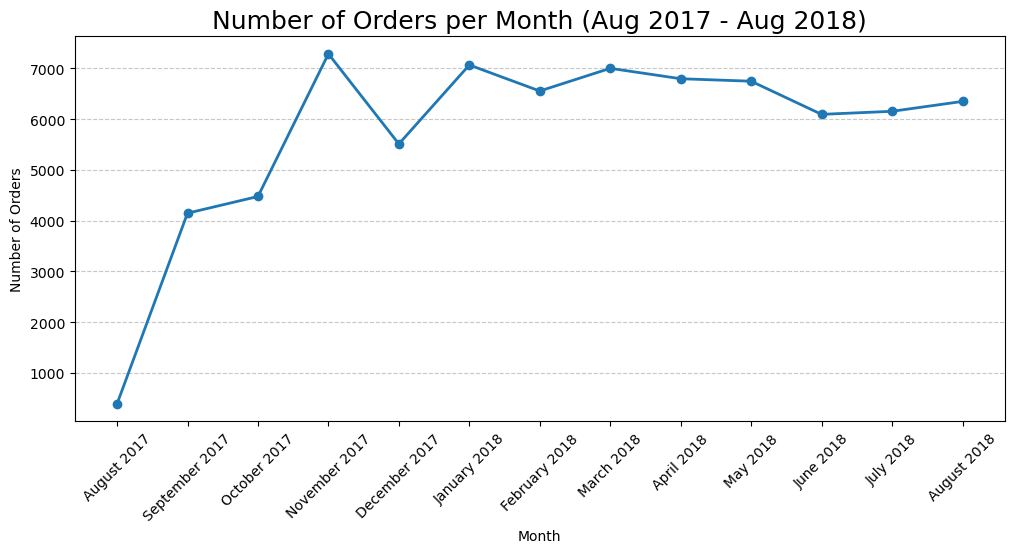

In [84]:
# Visualisasi Jumlah Pesanan per Bulan
plt.figure(figsize=(12, 5)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], 
         monthly_orders_df["order_count"], 
         marker='o', 
         linewidth=2 ) 

plt.title("Number of Orders per Month (Aug 2017 - Aug 2018)", loc="center", fontsize=18) 
plt.xlabel("Month", fontsize=10)
plt.ylabel("Number of Orders", fontsize=10)
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Terjadi peningkatan jumlah pesanan dari yang tadinya dibawah **1000 pesanan** pada **Agustus 2017** hingga menjadi diatas **4000 pesanan** di bulan setelahnya. Kenaikan ini terjadi sampai puncaknya di **November 2017** yang total pesanan mencapai lebih dari **7000**. 
- Terjadi penurunan total pesanan di bulan desember dengan angka 5000+ pesanan yang kemudian meningkat lagi di bulan kedepannya.

### Pertanyaan 2: Apabila Pelanggan di Segmentasikan berdasarkan besarnya spending yang dilakukan, Bagaimana aktivitas dari pelanggan tersebut?

In [85]:
spender_counts = all_data_df.groupby("spender_category")['customer_unique_id'].nunique().sort_values(ascending=False)

print(spender_counts)


spender_category
Low Spender     46673
High Spender    46668
Name: customer_unique_id, dtype: int64


In [86]:
latest_date = all_data_df["order_purchase_timestamp"].max()

# Filter hanya 12 bulan terakhir dari data
one_year_ago = latest_date - pd.DateOffset(years=1)
recent_data = all_data_df[all_data_df["order_purchase_timestamp"] >= one_year_ago] 

recent_data["month_year"] = recent_data["order_purchase_timestamp"].dt.to_period("M")

# Agregasi jumlah transaksi dan total revenue berdasarkan spender dan bulan
spender_activity = recent_data.groupby(["month_year", "spender_category"]).agg(
    order_count=("order_id", "nunique"),
    total_revenue=("payment_value", "sum")
).reset_index()


C:\Users\lutfi\AppData\Local\Temp\ipykernel_32976\37462483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data["month_year"] = recent_data["order_purchase_timestamp"].dt.to_period("M")


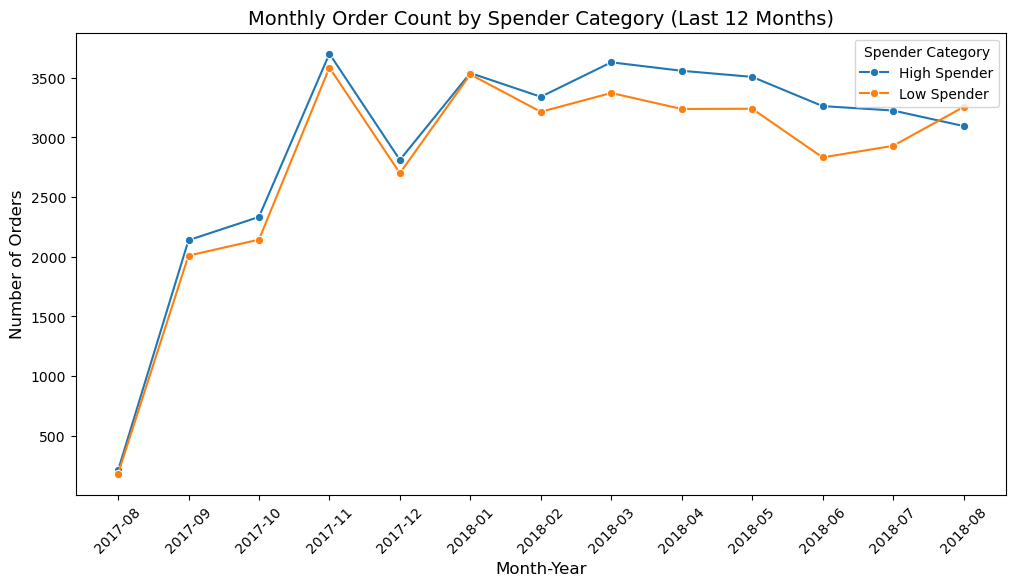

In [87]:
# Line plot untuk jumlah transaksi per bulan berdasarkan spender category
spender_activity['month_year'] = spender_activity['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=spender_activity, x="month_year", y="order_count", hue="spender_category", marker="o")

plt.xticks(rotation=45)
plt.title("Monthly Order Count by Spender Category (Last 12 Months)", fontsize=14)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend(title="Spender Category")

plt.show()


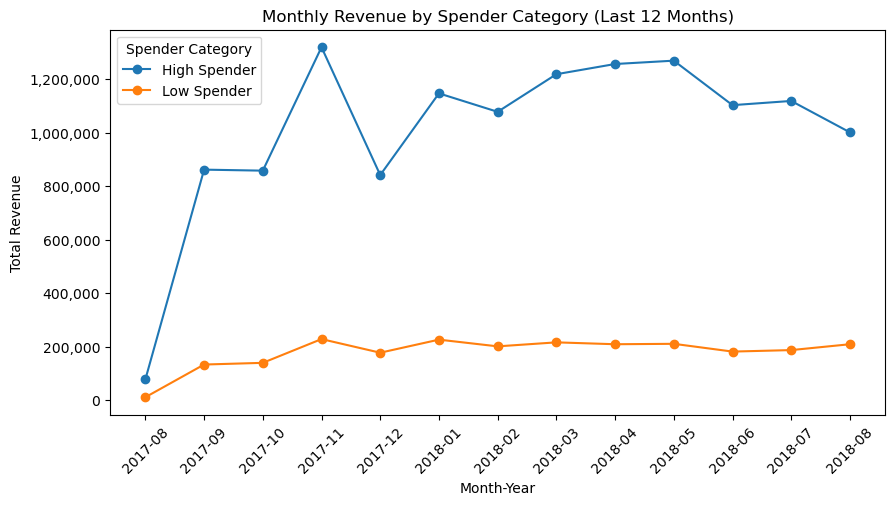

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))

for spender in spender_activity["spender_category"].unique():
    data = spender_activity[spender_activity["spender_category"] == spender]
    ax.plot(data["month_year"].astype(str), data["total_revenue"], marker='o', label=spender)

ax.set_title("Monthly Revenue by Spender Category (Last 12 Months)")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Total Revenue")
ax.legend(title="Spender Category")

# Format angka total revenue agar tidak dalam notasi ilmiah
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.show()

**Insight:**
Apabila dilakukan segmentasi berdasarkan besarnya spending, frekuensi pembelian customer dalam 2 kategori ini memang tidak terlampau berbeda, namun apabila dilihat dari jumlah total pengeluarannya sangat terlampau jauh

In [89]:
all_data_df.to_csv("all_data.csv", index=False)

## Conclusion

- Dalam setahun terakhir terjadi kenaikan yang sangat signifikan dari segi jumlah aktivitas penjualan. Jumlah pesanan dari yang tadinya dibawah **1000 pesanan** pada **Agustus 2017** hingga menjadi diatas **4000 pesanan** di bulan setelahnya. Kenaikan ini terjadi sampai puncaknya di **November 2017** yang total pesanan mencapai lebih dari **7000**. namun pada Desember 2018 terjadi penurunan penjualan yang tidak signifikan yang kemudian menjadi stabil
- Berdasarkan segmentasi customer berdasarkan spending yang dilakukan, memang perbedaan aktivitas pembelian dari keduanya tidak terlampau jauh, namun bila dilihat dari total pengeluaran sangatlah terlampau jauh.